In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
ds=pd.read_csv('Mall_Customers.csv')
ds

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


there are no null values in any column

In [4]:
## choosing columns for our model
# Here we will classify data according to the annual income and expenditure

In [24]:
X=ds.iloc[:,[3,4]].values

In [25]:
from sklearn.cluster import KMeans

In [26]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

In [27]:
wcss

[269981.28,
 183653.32894736843,
 106348.37306211122,
 73880.64496247195,
 44448.4554479337,
 40825.16946386947,
 33642.57922077923,
 26686.83778518779,
 24766.471609793443,
 23103.122085983916]

In [28]:
import seaborn as sns

Text(0, 0.5, 'wcss')

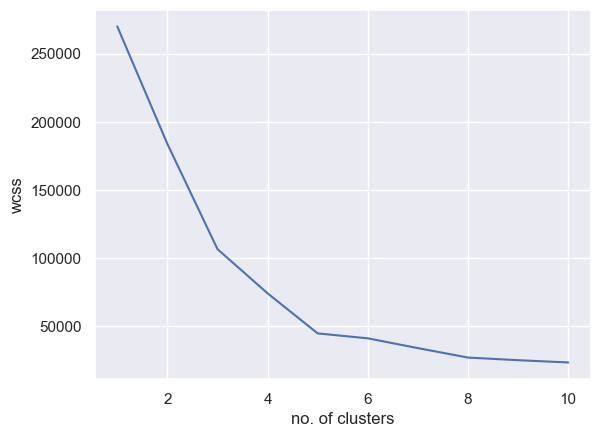

In [29]:
sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel('no. of clusters')
plt.ylabel('wcss')



In [30]:
# so here we choose number of clusters as 5 as we can see through this elbow graph that the optimum
#  number of clusters would be 5 where there is a sharp edge

In [31]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)

assigning label for every data


In [32]:
Y=kmeans.fit_predict(X)
Y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

Text(0.5, 1.0, 'customer')

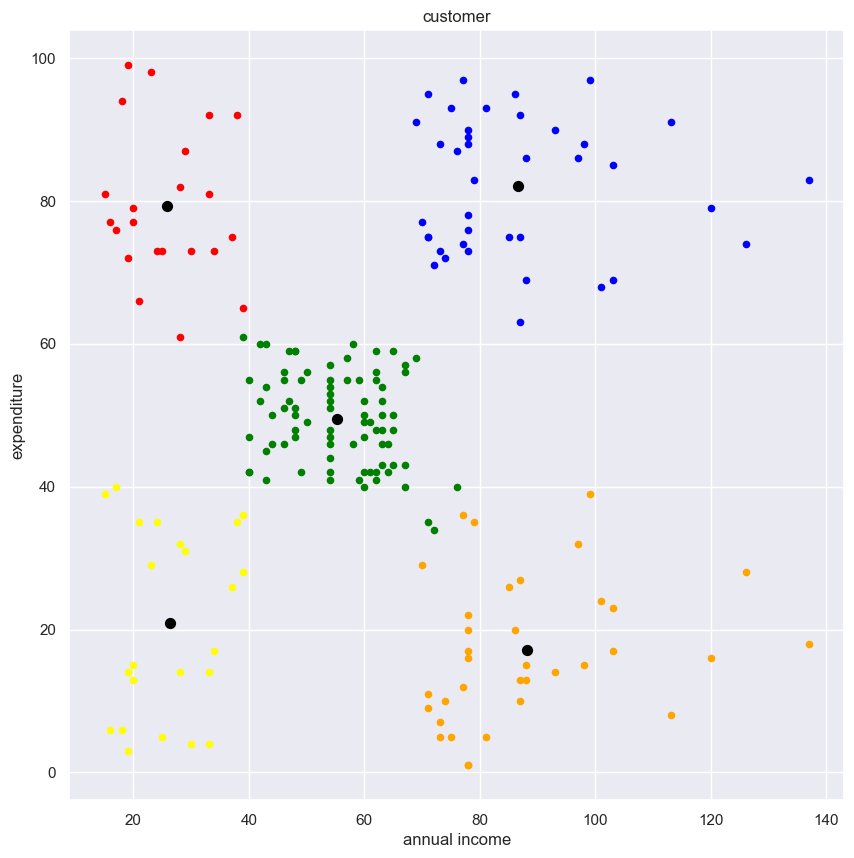

In [34]:
plt.figure(figsize=(10,10))
# plt.scatter(X[Y==0,0],X[Y==0,1],s=20,c='green',label='cluster 1')
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=20, c='green', label='cluster 1')

plt.scatter(X[Y==1,0],X[Y==1,1],s=20,c='blue',label='cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=20,c='red',label='cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=20,c='orange',label='cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=20,c='yellow',label='cluster 5')

# # for centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='black',label='centroid')
plt.xlabel('annual income')
plt.ylabel('expenditure')
plt.title('customer')